# Random walk simulations

In [1]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt

### Simulating a 1D unbiased random walk 

- Each random walker will be modeled by a random variable $X_i$, assuming +1 or -1 values at every step. We will run N random walkers (rows) over n steps (columns)
- We then take **cumulative sum  over n steps** thereby summing n random variables for N walkers. This will be done via a convenient ```np.cumsum()``` method.


In [2]:
def rw_1d(n, N):
    '''
    n: Number of steps
    N: Number of walkers
    returns np.array with shape (n, N) 
    '''
    
    # Create random walks 
    r  = np.random.choice([-1,1], size=(n, N))
    
    #Sum over n steps
    rw = r.cumsum(axis=0)

    #Set initial position 
    rw[0,:]=0 
    
    return rw

In [5]:
rw = rw_1d(2000, 1000)

print(rw.shape)

(2000, 1000)


Text(0.5, 0, 'n, steps')

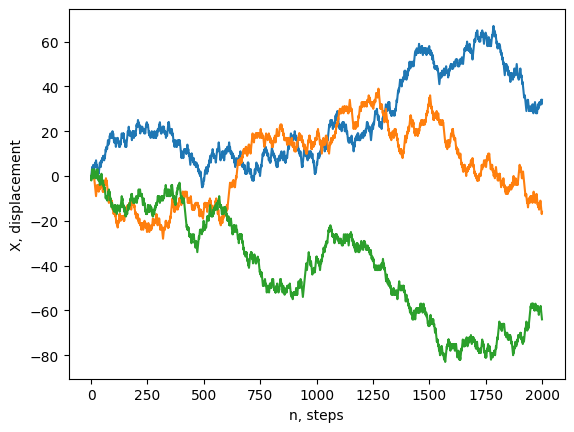

In [6]:
plt.plot(rw[:,:3]) # plot a few random walkers
plt.ylabel('X, displacement')
plt.xlabel('n, steps')

In [13]:
from scipy import stats
# Simulate 1D random walk
n_max = 1000
N     = 1000 
rw    = rw_1d(n_max, N)

def rw_plotter(t=1):
    
    fig, ax = plt.subplots(nrows=2)

    ### plot random walk
    ax[0].plot(rw)
    ax[0].axvline(x=t, color='black', linestyle='-', lw=2)
   
    ## Plot gaussian with width t**0.5
    ax[1].hist(rw[t, :], 
               color='orange', 
               density=True, 
               label=f'time={t}')
    
    x = np.linspace(rw.min(), rw.max(), 1000)
    y = stats.norm.pdf(x, 0, np.sqrt(t))
    ax[1].plot(x, y, 
               color='black', 
               lw=2, 
               label='normal')  

    ax[0].set_xlabel('X')
    ax[0].set_ylabel('t')
    ax[0].set_title('RW trajectries');
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('p(x)')
    
    ax[1].set_xlim([-100, 100])
    ax[1].legend()
    ax[1].set_title('$\sigma/t$='+f'{np.var(rw[t, :])/t:.3f}')
    fig.tight_layout()
    plt.show()

In [12]:
interactive( rw_plotter, t=(1, n_max-1) )

interactive(children=(IntSlider(value=1, description='t', max=999, min=1), Output()), _dom_classes=('widget-in…

**Question** 

Would sample mean get more accurate or less as a function of time?

### Mean square displacement (MSD) of a random walker

- After time n number of steps (or time t) how far has random walker moved from the origin?

$$R_n = \sum^{n-1}_{i=0}X_n$$

- We quantify this by computing **Mean Square Displacement (MSD)**. Note that the mean is computed over N number of simulated trajectories (ensemble average). Invoking central limit theorem, or simply realizing that off diagonal terms drop off we end up with the same result as in LLN.

$$
MSD(n)= \Big\langle \big ( R_n - R_0 \big)^2 \Big \rangle \sim n
$$

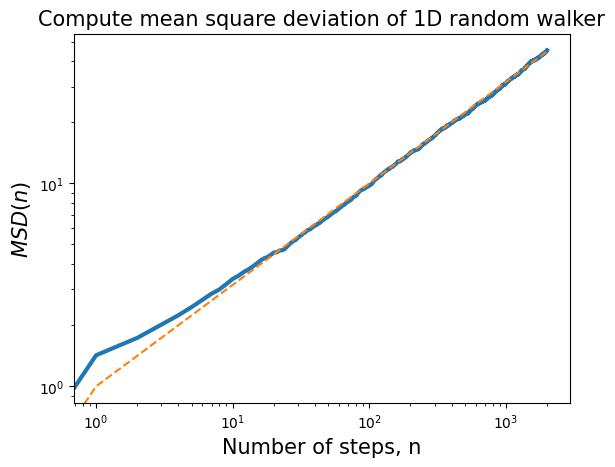

In [30]:
n, N = 2000, 1000
rw = rw_1d(n, N)

t = np.arange(n)

R2 = (rw[:, :] - rw[0, :])**2 # Notice we subtract initial time

msd =  np.mean(R2, axis=1)    # Notice we average over N

plt.loglog(t, np.sqrt(msd), lw=3) 

plt.loglog(t, np.sqrt(t), '--')

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)$',fontsize=15);

### 2D random walk

In [2]:
def rw_2d(n, N):
    '''2d random walk function:
    n: Number of steps
    N: Number of trajecotry
    returns np.array with shape (T, N)
    '''
    verteces = np.array([(1,  0),
                         (0,  1),
                         (-1, 0),
                         (0, -1)])
    
    rw       = verteces[np.random.choice([0,1,2,3], size=(n, N))]
    
    rw[0, :, :] = 0
    
    return rw.cumsum(axis=0)

In [3]:
traj = rw_2d(n=10000, N=1000)

In [4]:
traj.shape

(10000, 1000, 2)

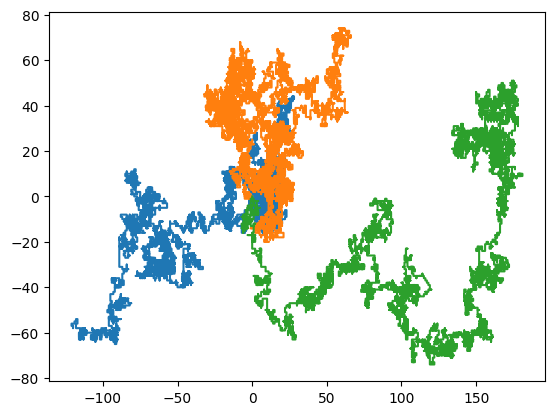

In [5]:
plt.plot(traj[:,:3, 0], traj[:,:3, 1]) # plot first three random walkers

### Compute RSD for 2D random walker

In [6]:
#Simulate 2D random walk
n, N = 10000, 1000
traj = rw_2d(n, N)

#Compute RSD 
dx = (traj[:, :, 0]- traj[0, :, 0]) 
dy = (traj[:, :, 1]- traj[0, :, 1]) 

R2     = np.mean(dx**2 + dy**2, axis = 1)   # notice that we are averaging over N walkers 

In [7]:
R2.shape

(10000,)

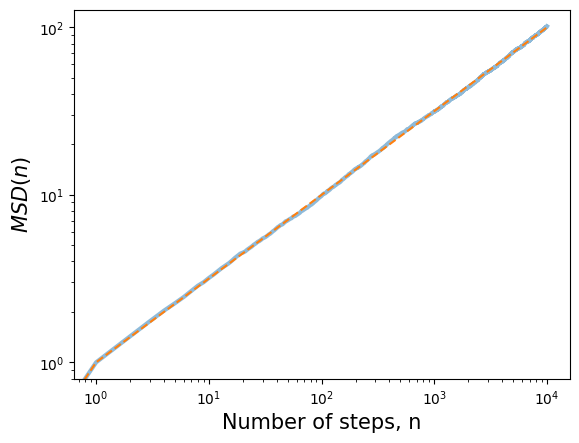

In [8]:
fig, ax  = plt.subplots()

t = np.arange(n) # time axis
ax.loglog(t, np.sqrt(R2), lw=3, alpha=0.5);
ax.loglog(t, np.sqrt(t), '--');

ax.set_xlabel('Number of steps, n',fontsize=15)
ax.set_ylabel(r'$MSD(n)$',fontsize=15);

### Oop 

In [ ]:
class RandomWalker1D:

    def __init__(self, steps=1000, seed=None):

        self.steps     = steps
        self.positions = None

    def walk(self):
        
        moves = np.random.choice([-1, 1], size=self.steps)  # Move left (-1) or right (+1)
        self.positions = np.cumsum(moves)
        self.positions = np.insert(self.positions, 0, 0)  # Start at origin

    def plot(self):
        if self.positions is None:
            raise ValueError("Run walk() first to generate a trajectory.")
        plt.plot(self.positions)
        plt.xlabel("Step")
        plt.ylabel("Position")
        plt.title("1D Random Walk")
        plt.show()


In [ ]:
walker = RandomWalker1D(steps=10000, seed=42)

walker.walk()
walker.plot()

In [ ]:
class RandomWalker2D:

    def __init__(self, steps=1000, seed=None):

        self.steps = steps
        self.positions = None

    def walk(self):

        moves = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])  # Four possible directions
        choices = np.random.choice(4, size=self.steps)  # Random indices for moves
        self.positions = np.cumsum(moves[choices], axis=0)
        self.positions = np.vstack(([0, 0], self.positions))  # Start at origin

    def plot(self):
        if self.positions is None:
            raise ValueError("Run walk() first to generate a trajectory.")
        plt.plot(self.positions[:, 0], self.positions[:, 1], marker='o', markersize=2, linestyle='-')
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("2D Random Walk")
        plt.show()

In [ ]:
walker = RandomWalker2D(steps=100, seed=42)

walker.walk()
walker.plot()

#### References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**
- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)

### Problems



####  Problem-1 Confined diffusion.
Simulate 2D random walk in a circular confinement. Re-write 2D random walk  code to simulate diffusion of a particle which is stuck inside a sphere. 
Study how root mean square deviation of position scales with time. 
- Carry out simulations for different confinement sizes. 
- Make plots of simulated trajectories.

#### Problem-2 Return to the origin!

- Simulate random walk in 1D and 2D for a different number of steps $N=10, 10^2,10^3, 10^4, 10^5$
- Compute average number of returns to the origin $\langle n_{orig} \rangle$. That is number of times a random walker returns to the origin $0$ for 1D  or (0,0)$ for 2D . You may want to use some 1000 trajectories to obtain average. 
- Plot how $\langle n_{orig} \rangle$ depends on number of steps N for 1D and 2D walker.

####  Problem-3 Breaking the CLT; Cauchy vs Normal random walk in 2D

For this problem we are going to simulate two kinds of random walks in continuum space (not lattice): Levy flights and Normal distributd random walk. 

To simulate a 2D continuum space random walk we need to generate random step sizes $r_x$, $r_y$. 
Also you will need unifrom random namber to sample angles in 2D giving you a conitnuum random walk in 2D space: $x = r_x sin\theta$ and $y=r_ycos\theta$

- Normally: $r\sim N(0,1)$
- Cauchy distribution (long tails, infinite variance) $r\sim Cauchy(0,1)$
- Unform angles $\theta \sim U(0,1)$

Visualize random walk using matplotlib and study statistics of random walkers the way that is done for normal random walk/brownian motion examples!

#### Problem-4 Continuous time random walk (CTRW)

Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. <br>
Hint: you may want to use random variables from scipy.stats.exp <br>

[scipy.stats.expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) <br>

Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 